In [1]:
%matplotlib inline

In [197]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib import offsetbox

from sklearn.datasets import make_blobs, load_iris, make_circles, fetch_20newsgroups, make_s_curve, load_digits, fetch_lfw_people

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

from sklearn.decomposition import PCA, TruncatedSVD, KernelPCA, LatentDirichletAllocation, NMF

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

from sklearn.manifold import Isomap, MDS, TSNE, LocallyLinearEmbedding, SpectralEmbedding

from sklearn.preprocessing import MinMaxScaler, StandardScaler

from sklearn.ensemble import RandomTreesEmbedding
from sklearn.neighbors import NeighborhoodComponentsAnalysis
from sklearn.pipeline import make_pipeline
from sklearn.random_projection import SparseRandomProjection

from scipy.stats import loguniform

from sklearn.metrics import ConfusionMatrixDisplay, classification_report
from sklearn.model_selection import RandomizedSearchCV, train_test_split

from sklearn.svm import SVC

from sklearn.model_selection import cross_val_score

from sklearn.ensemble import RandomForestClassifier

from time import time

import warnings
from scipy.sparse import SparseEfficiencyWarning

In [198]:
LOKY_MAX_CPU_COUNT = 2

In [199]:
warnings.filterwarnings("ignore", category = UserWarning)
warnings.filterwarnings("ignore", category=SparseEfficiencyWarning)

# Dimensionality Reduction

In [4]:
iris = load_iris()

In [5]:
attributes, target = iris['data'], iris['target']

When we have Dimensionality Reduction, we fit it to the training data, not to the whole dataset.

<b>PCA</b>

PCA is unsupervised method. It does not have target.

In [6]:
pca = PCA()

In [7]:
pca.fit(attributes)

PCA()

In [8]:
pca.components_

array([[ 0.36138659, -0.08452251,  0.85667061,  0.3582892 ],
       [ 0.65658877,  0.73016143, -0.17337266, -0.07548102],
       [-0.58202985,  0.59791083,  0.07623608,  0.54583143],
       [ 0.31548719, -0.3197231 , -0.47983899,  0.75365743]])

In [9]:
pca.mean_

array([5.84333333, 3.05733333, 3.758     , 1.19933333])

In [10]:
transformed_attr = pca.transform(attributes)

In [11]:
transformed_attr.shape, attributes.shape

((150, 4), (150, 4))

The basis has been changed.

In [12]:
transformed_attr

array([[-2.68412563e+00,  3.19397247e-01, -2.79148276e-02,
         2.26243707e-03],
       [-2.71414169e+00, -1.77001225e-01, -2.10464272e-01,
         9.90265503e-02],
       [-2.88899057e+00, -1.44949426e-01,  1.79002563e-02,
         1.99683897e-02],
       [-2.74534286e+00, -3.18298979e-01,  3.15593736e-02,
        -7.55758166e-02],
       [-2.72871654e+00,  3.26754513e-01,  9.00792406e-02,
        -6.12585926e-02],
       [-2.28085963e+00,  7.41330449e-01,  1.68677658e-01,
        -2.42008576e-02],
       [-2.82053775e+00, -8.94613845e-02,  2.57892158e-01,
        -4.81431065e-02],
       [-2.62614497e+00,  1.63384960e-01, -2.18793179e-02,
        -4.52978706e-02],
       [-2.88638273e+00, -5.78311754e-01,  2.07595703e-02,
        -2.67447358e-02],
       [-2.67275580e+00, -1.13774246e-01, -1.97632725e-01,
        -5.62954013e-02],
       [-2.50694709e+00,  6.45068899e-01, -7.53180094e-02,
        -1.50199245e-02],
       [-2.61275523e+00,  1.47299392e-02,  1.02150260e-01,
      

In [13]:
transformed_attr.std(axis = 0)

array([2.04940319, 0.49097143, 0.27872586, 0.1538707 ])

In [14]:
transformed_attr.var(axis = 0)

array([4.20005343, 0.24105294, 0.0776881 , 0.02367619])

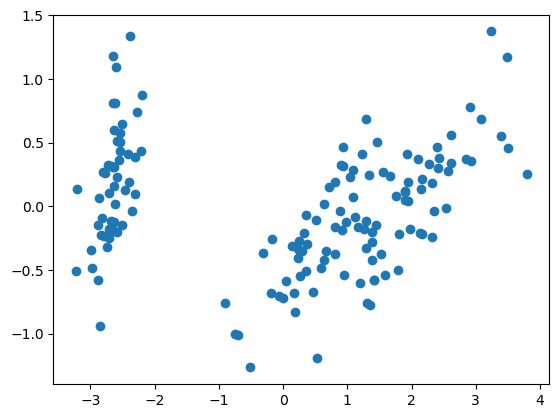

In [15]:
plt.scatter(transformed_attr[:, 0], transformed_attr[:, 1])
plt.show()

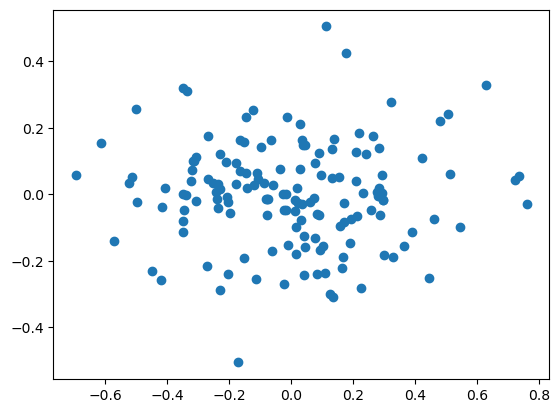

In [16]:
plt.scatter(transformed_attr[:, 2], transformed_attr[:, 3])
plt.show()

<b>PCA -> n_components</b>

In [17]:
pca = PCA(n_components = 2)

In [18]:
pca.fit(attributes)

PCA(n_components=2)

In [19]:
pca.components_

array([[ 0.36138659, -0.08452251,  0.85667061,  0.3582892 ],
       [ 0.65658877,  0.73016143, -0.17337266, -0.07548102]])

In [20]:
pca.mean_

array([5.84333333, 3.05733333, 3.758     , 1.19933333])

In [21]:
transformed_attr = pca.transform(attributes)

In [22]:
transformed_attr.shape, attributes.shape

((150, 2), (150, 4))

In [23]:
transformed_attr

array([[-2.68412563,  0.31939725],
       [-2.71414169, -0.17700123],
       [-2.88899057, -0.14494943],
       [-2.74534286, -0.31829898],
       [-2.72871654,  0.32675451],
       [-2.28085963,  0.74133045],
       [-2.82053775, -0.08946138],
       [-2.62614497,  0.16338496],
       [-2.88638273, -0.57831175],
       [-2.6727558 , -0.11377425],
       [-2.50694709,  0.6450689 ],
       [-2.61275523,  0.01472994],
       [-2.78610927, -0.235112  ],
       [-3.22380374, -0.51139459],
       [-2.64475039,  1.17876464],
       [-2.38603903,  1.33806233],
       [-2.62352788,  0.81067951],
       [-2.64829671,  0.31184914],
       [-2.19982032,  0.87283904],
       [-2.5879864 ,  0.51356031],
       [-2.31025622,  0.39134594],
       [-2.54370523,  0.43299606],
       [-3.21593942,  0.13346807],
       [-2.30273318,  0.09870885],
       [-2.35575405, -0.03728186],
       [-2.50666891, -0.14601688],
       [-2.46882007,  0.13095149],
       [-2.56231991,  0.36771886],
       [-2.63953472,

In [24]:
transformed_attr.std(axis = 0)

array([2.04940319, 0.49097143])

In [25]:
transformed_attr.var(axis = 0)

array([4.20005343, 0.24105294])

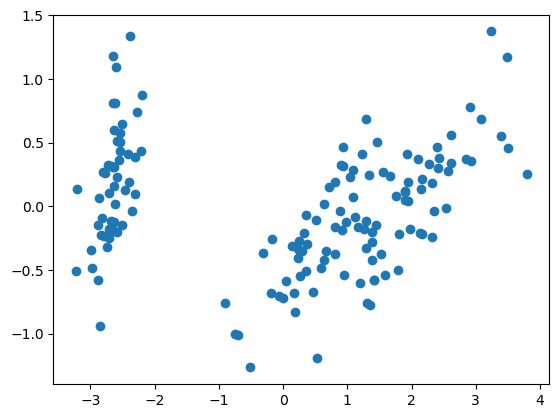

In [26]:
plt.scatter(transformed_attr[:, 0], transformed_attr[:, 1])
plt.show()

<b>Explained variance</b>

In [27]:
pca = PCA()

In [28]:
pca.fit(attributes)

PCA()

In [29]:
pca.explained_variance_

array([4.22824171, 0.24267075, 0.0782095 , 0.02383509])

In [30]:
transformed_attr = pca.transform(attributes)

In [31]:
transformed_attr.var(axis = 0)

array([4.20005343, 0.24105294, 0.0776881 , 0.02367619])

In [32]:
attributes.var(axis = 0)

array([0.68112222, 0.18871289, 3.09550267, 0.57713289])

In [33]:
pca.explained_variance_.sum()

4.572957046979804

In [34]:
pca.explained_variance_ratio_

array([0.92461872, 0.05306648, 0.01710261, 0.00521218])

In [35]:
pca.explained_variance_ratio_.sum()

1.0

In [36]:
pca.explained_variance_ratio_.cumsum()

array([0.92461872, 0.97768521, 0.99478782, 1.        ])

<b>setting the n_components to a value of explained variance</b>

In [37]:
pca = PCA(n_components = 0.98)

In [38]:
pca.fit(attributes)

PCA(n_components=0.98)

In [39]:
pca.explained_variance_

array([4.22824171, 0.24267075, 0.0782095 ])

In [40]:
transformed_attr = pca.transform(attributes)

In [41]:
transformed_attr.var(axis = 0)

array([4.20005343, 0.24105294, 0.0776881 ])

In [42]:
pca.explained_variance_ratio_

array([0.92461872, 0.05306648, 0.01710261])

In [43]:
pca.explained_variance_ratio_.cumsum()

array([0.92461872, 0.97768521, 0.99478782])

n_components = 0.95

In [44]:
pca = PCA(n_components = 0.95)

In [45]:
pca.fit(attributes)

PCA(n_components=0.95)

In [46]:
pca.explained_variance_

array([4.22824171, 0.24267075])

In [47]:
transformed_attr = pca.transform(attributes)

In [48]:
transformed_attr.var(axis = 0)

array([4.20005343, 0.24105294])

In [49]:
pca.explained_variance_ratio_

array([0.92461872, 0.05306648])

In [50]:
pca.explained_variance_ratio_.cumsum()

array([0.92461872, 0.97768521])

<b>PCA on Goussian blob dataset</b>

In [51]:
x = np.random.normal(3.5, scale = 3, size = 500)

In [52]:
y = np.random.normal(2.4, scale = 2, size = 500)

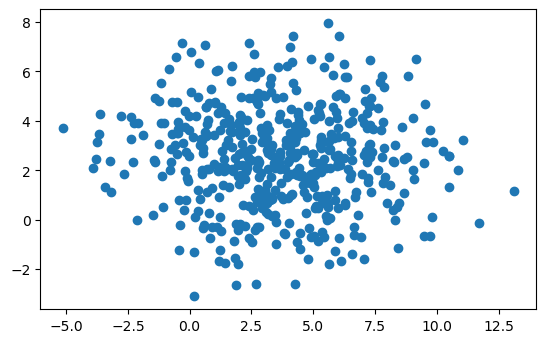

In [53]:
plt.scatter(x, y)
plt.gca().set_aspect('equal')
plt.show()

In [54]:
points = np.array([x, y]).reshape(500, 2)
points[:10]

array([[ 5.00751777,  7.12888336],
       [ 3.11792521,  0.15419904],
       [ 7.91257696,  7.05939651],
       [ 5.35714037,  2.71530464],
       [ 3.88402052, -1.22523514],
       [ 2.05362195,  6.67724568],
       [ 6.50641811,  5.62515254],
       [ 5.64301482,  9.50555684],
       [-0.17540316,  5.12063486],
       [-2.12587903,  1.40284254]])

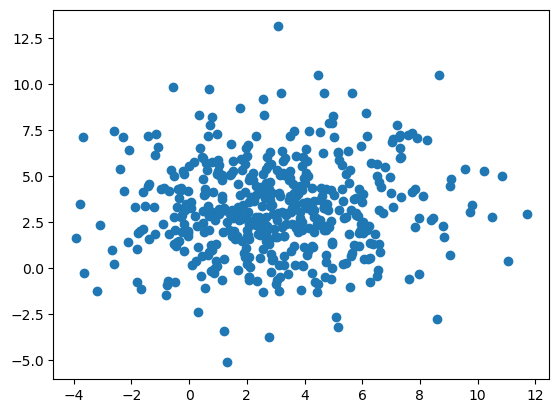

In [55]:
plt.scatter(points[:, 0], points[:, 1])

In [56]:
results = points @ np.array([[1, 0.5], [0.6, 1]])

In [57]:
results[:10]

array([[ 9.28484779,  9.63264225],
       [ 3.21044463,  1.71316164],
       [12.14821486, 11.01568499],
       [ 6.98632315,  5.39387482],
       [ 3.14887944,  0.71677512],
       [ 6.05996935,  7.70405665],
       [ 9.88150964,  8.87836159],
       [11.34634893, 12.32706425],
       [ 2.89697776,  5.03293328],
       [-1.28417351,  0.33990302]])

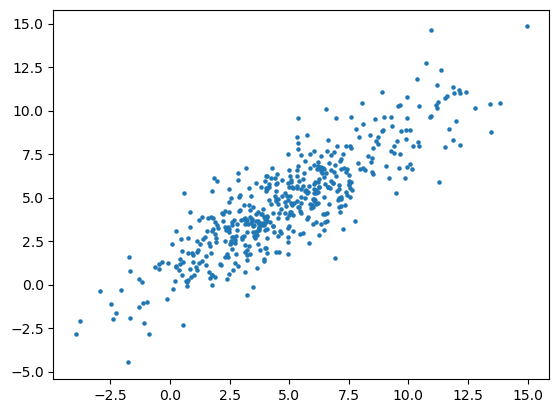

In [58]:
plt.scatter(results[:, 0], results[:, 1], s = 5)

In [59]:
data = results.copy()

In [60]:
center = data.mean(axis = 0)
center

array([4.8713157 , 4.66034928])

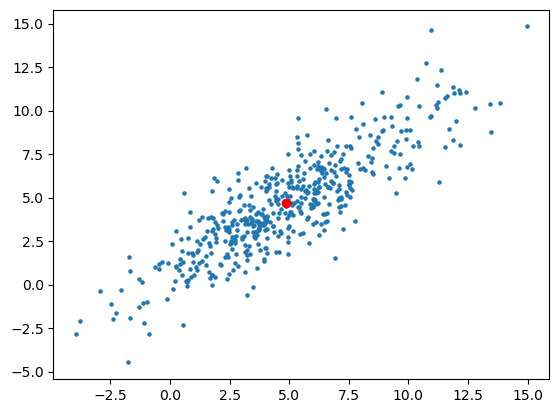

In [61]:
plt.scatter(results[:, 0], results[:, 1], s = 5)
plt.scatter(center[0], center[1], c = 'red')
plt.show()

In [62]:
np.corrcoef(data, rowvar = False)

array([[1.        , 0.86077125],
       [0.86077125, 1.        ]])

In [63]:
np.cov(data, rowvar = False)

array([[10.17862428,  7.98050784],
       [ 7.98050784,  8.44493804]])

The covariation of a variable with itself is its dispersion of its values / variance.

It is a symmetric matrix, which means that its eigenvectors are orthogonal. However, they are not normalized i.e. their norm is different (the norm of the first eigenvector is greater than the norm of the second, which is greater than the norm of the third, and so on). 

The covariation matrix is converted to to a diagonal matrix, where all the elements outside the main diagonal are zero.

\begin{pmatrix}
\lambda_1 & 0 & 0 & \dots & 0 \\
0 & \lambda_2 & 0 & \dots & 0 \\
0 & 0 & \lambda_3 & \dots & 0 \\
\vdots & \vdots & \vdots & \ddots & \vdots \\
0 & 0 & 0 & \dots & \lambda_n
\end{pmatrix}

In [64]:
covariance_matrix = np.cov(data - center, rowvar = False) # by subtracting the mean, we center the data

In [65]:
np.linalg.eig(covariance_matrix)

EigResult(eigenvalues=array([17.33922922,  1.2843331 ]), eigenvectors=array([[ 0.74430669, -0.66783797],
       [ 0.66783797,  0.74430669]]))

Eigenvalues correspond to the values of the diagonal in a diagonal matrix, the other elements are zeros. Eigenvectors form the basis for the transformation that diagonalizes the original matrix. 

In [66]:
# checking if they are orthogonal -> they are
np.linalg.eig(covariance_matrix).eigenvectors

array([[ 0.74430669, -0.66783797],
       [ 0.66783797,  0.74430669]])

In [67]:
# scalar product -> it is 0, so they are orthogonal
np.dot(np.linalg.eig(covariance_matrix).eigenvectors[:, 0], np.linalg.eig(covariance_matrix).eigenvectors[:, 1])

0.0

In [68]:
pca.fit(data).components_ # PCs correspond to the eigenvectors

array([[ 0.74430669,  0.66783797],
       [-0.66783797,  0.74430669]])

pca.transform -> transforms the original data according to the new basis vectors (the principal components are the new basis vectors).

In [69]:
transformed_data = pca.transform(data)

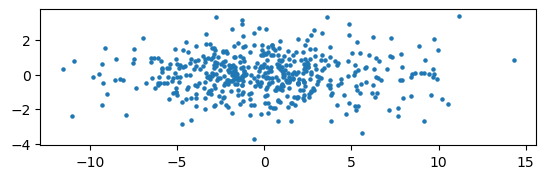

In [70]:
plt.scatter(transformed_data[:, 0], transformed_data[:, 1], s = 5)
plt.gca().set_aspect('equal')
plt.show()

These are the eigen coordinates of the dataset.

<b>PC1</b>

In [71]:
pca = PCA(n_components = 1)

In [72]:
pca.fit(data)

PCA(n_components=1)

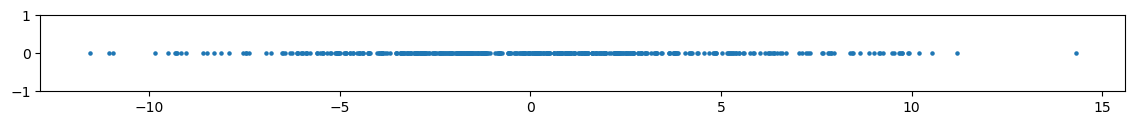

In [73]:
plt.figure(figsize = (14, 10))
plt.scatter(transformed_data[:, 0], [0] * len(data), s = 5)
plt.ylim(-1, 1)
plt.gca().set_aspect('equal')
plt.show()

Some information is lost, but it is minimal.

PCA is very useful when we have big data. it is not applicable to sparse matrices.

PCA makes singular value decomposition.

In [74]:
texts = fetch_20newsgroups()['data'][:50]

In [75]:
tfidf = TfidfVectorizer()

In [76]:
tfidf.fit(texts)

TfidfVectorizer()

In [77]:
tfidf_result = tfidf.transform(texts)

In [78]:
tfidf_result

<50x3612 sparse matrix of type '<class 'numpy.float64'>'
	with 7607 stored elements in Compressed Sparse Row format>

In [79]:
tfidf_dr = PCA(n_components = 300)

But PCA could not be used here and will give an error, because it cannot work on sparse matrices.

Another method can be used, but the ordering from the highest to the lowest explained variance will be lost.

<b>TruncatedSVD</b>

Truncated SVD (Singular Value Decomposition) is a dimensionality reduction technique that can be used for large, sparse datasets, such as text data in Natural Language Processing. It decomposes a matrix into three components — U (left singular vectors), Σ (diagonal matrix of singular values), and V^T (right singular vectors). It keeps only the top k components, and thus, reduces the number of features while retaining as much variance as possible (similar to PCA), but it is particularly suited for sparse matrices.

In [80]:
tfidf_dr = TruncatedSVD(n_components = 25)

<b>KernelPCA</b>

In [81]:
kernel_pca = KernelPCA(n_components = 2, kernel = 'rbf')

In [82]:
kernel_pca.fit(data)

KernelPCA(kernel='rbf', n_components=2)

In [83]:
kernel_pcs = kernel_pca.transform(data)

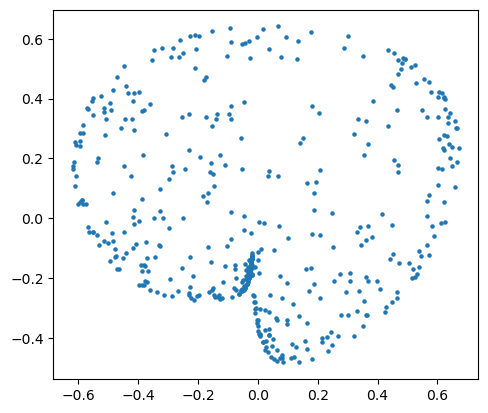

In [84]:
plt.scatter(kernel_pcs[:, 0], kernel_pcs[:, 1], s = 5)
plt.gca().set_aspect('equal')
plt.show()

In [85]:
kernel_pca = KernelPCA(kernel = 'rbf', gamma = 5)

In [86]:
kernel_pca.fit(data)

KernelPCA(gamma=5, kernel='rbf')

In [87]:
kernel_pcs = kernel_pca.transform(data)

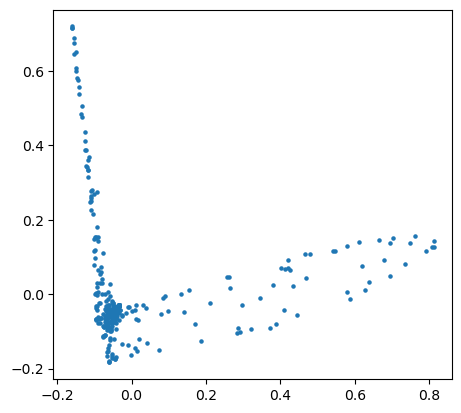

In [88]:
plt.scatter(kernel_pcs[:, 0], kernel_pcs[:, 1], s = 5)
plt.gca().set_aspect('equal')
plt.show()

<b>Linear Discriminant Analysis (LDA / LinDA)</b>

LDA is a supervised method. It tries to identify the attributes that account for the most variance between classes. It returns a transformation of the input data (like PCA).

Code source: https://scikit-learn.org/stable/auto_examples/decomposition/plot_pca_vs_lda.html

explained variance ratio (first two components): [0.92461872 0.05306648]


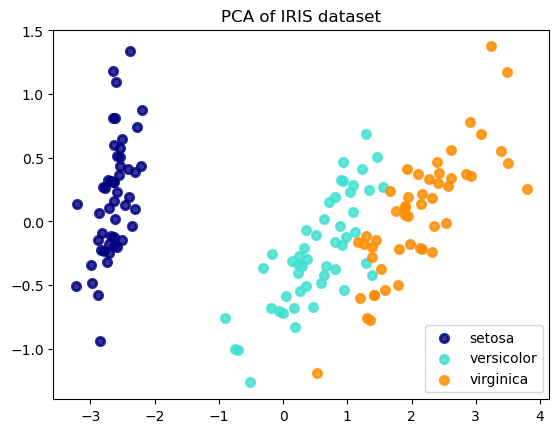

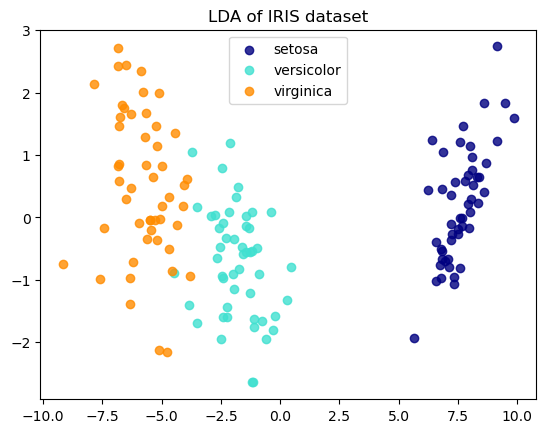

In [89]:
iris = load_iris()

X = iris.data
y = iris.target
target_names = iris.target_names

pca = PCA(n_components=2)
X_r = pca.fit(X).transform(X)

lda = LinearDiscriminantAnalysis(n_components=2)
X_r2 = lda.fit(X, y).transform(X)

# Percentage of variance explained for each components
print(f"explained variance ratio (first two components): {str(pca.explained_variance_ratio_)}")

plt.figure()
colors = ["navy", "turquoise", "darkorange"]
lw = 2

for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(
        X_r[y == i, 0], X_r[y == i, 1], color=color, alpha=0.8, lw=lw, label=target_name
    )
plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.title("PCA of IRIS dataset")

plt.figure()
for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(
        X_r2[y == i, 0], X_r2[y == i, 1], alpha=0.8, color=color, label=target_name
    )
plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.title("LDA of IRIS dataset")

plt.show()

# Manifold Llearning

embedding -> a 2D form (manifold, surface) in 3D space

<b>Isometric mapping (Isomap)</b>

Find the kNN of each point -> Construct a connectivity graph /Two points are connected if they're neighbors (from the first step)/ -> Compute shortest paths (Dijkstra, Floyd – Warshall) -> Perform projection on the graph

Very useful for illustration.

In [90]:
isomap = Isomap(n_neighbors = 5, n_components = 2)
transformed_data = isomap.fit_transform(data)

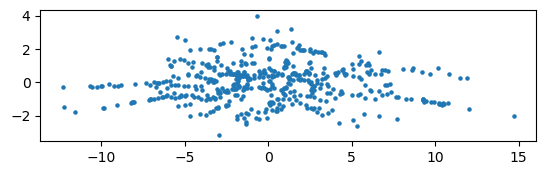

In [91]:
plt.scatter(transformed_data[:, 0], transformed_data[:, 1], s = 5)
plt.gca().set_aspect('equal')
plt.show()

## Implementation of Isomap

This notebook includes code reproduced from the geeksforgeeks documentation: [Isomap | A Non-linear Dimensionality Reduction Technique](https://www.geeksforgeeks.org/isomap-a-non-linear-dimensionality-reduction-technique/)

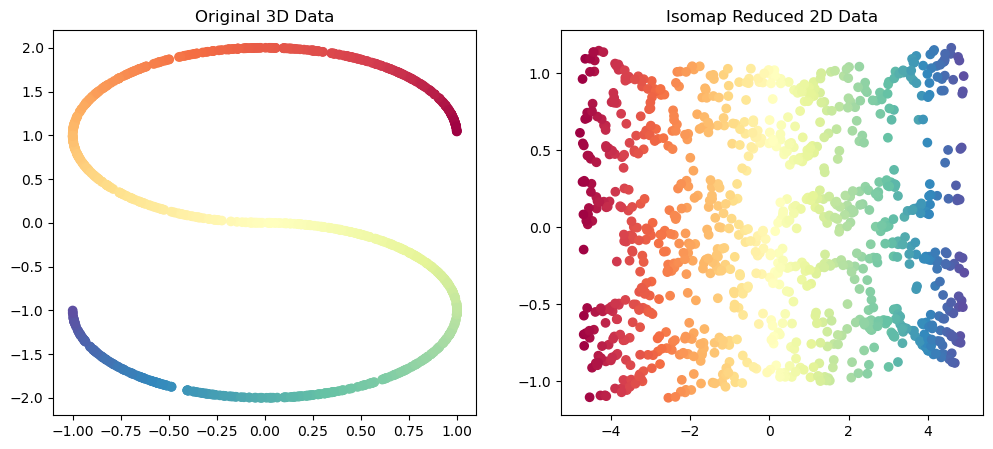

In [92]:
# Generate S-curve data
X, color = make_s_curve(n_samples=1000, random_state=42)

# Apply Isomap
isomap = Isomap(n_neighbors=10, n_components=2)
X_isomap = isomap.fit_transform(X)

# Plot the original and reduced-dimensional data
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

ax[0].scatter(X[:, 0], X[:, 2], c=color, cmap=plt.cm.Spectral)
ax[0].set_title('Original 3D Data')

ax[1].scatter(X_isomap[:, 0], X_isomap[:, 1], c=color, cmap=plt.cm.Spectral)
ax[1].set_title('Isomap Reduced 2D Data')

plt.show()

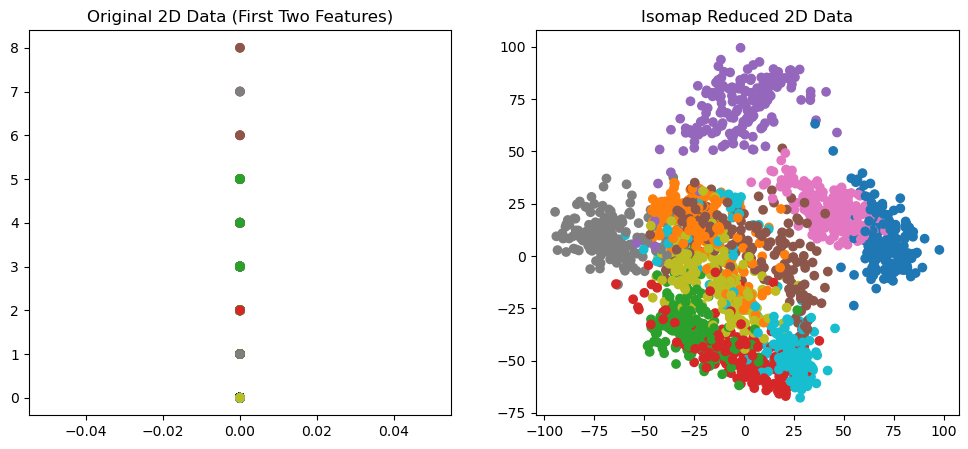

In [114]:
# Load the digits dataset
digits = load_digits()

# Apply Isomap
isomap = Isomap(n_neighbors=30, n_components=2)
digits_isomap = isomap.fit_transform(digits.data)

# Plot the original and reduced-dimensional data
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

ax[0].scatter(digits.data[:, 0], digits.data[:, 1], c=digits.target, cmap=plt.cm.tab10)
ax[0].set_title('Original 2D Data (First Two Features)')

ax[1].scatter(digits_isomap[:, 0], digits_isomap[:, 1], c=digits.target, cmap=plt.cm.tab10)
ax[1].set_title('Isomap Reduced 2D Data')

plt.show()

<b>t-SNE</b>

t-distributed Stochastic Neighbor Embedding

t-SNE looks for local clusters in the data. It is useful for revealing clusters and structure. t-SNE focuses on preserving the local structure of the data, meaning it tries to ensure that points that are close together in the high-dimensional space remain close in the lower-dimensional space. It does this by modeling pairwise similarities between points and seeks to maintain these relationships when projecting the data into two or three dimensions, which makes it very useful for visualizing clusters and local neighborhoods.

In [94]:
tsne = TSNE(n_components = 2, init = "pca")
transformed_data = tsne.fit_transform(data)

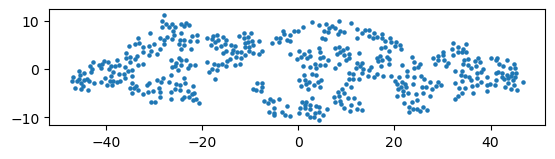

In [95]:
plt.scatter(transformed_data[:, 0], transformed_data[:, 1], s = 5)
plt.gca().set_aspect('equal')
plt.show()

Source: 
This notebook includes code adapted from the scikit-learn documentation: 
[Manifold learning on handwritten digits: Locally Linear Embedding, Isomap…](https://scikit-learn.org/stable/auto_examples/manifold/plot_lle_digits.html).
Original code by scikit-learn developers, available under the BSD 3-Clause License.

In [96]:
digits = load_digits(n_class=6)
X, y = digits.data, digits.target
n_samples, n_features = X.shape
n_neighbors = 30

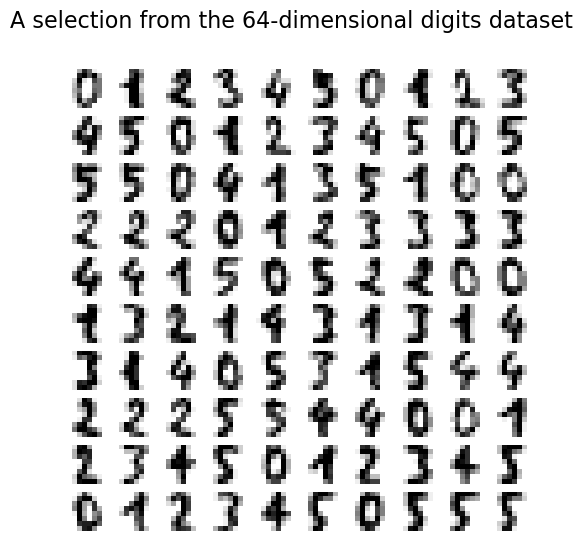

In [97]:
fig, axs = plt.subplots(nrows=10, ncols=10, figsize=(6, 6))
for idx, ax in enumerate(axs.ravel()):
    ax.imshow(X[idx].reshape((8, 8)), cmap=plt.cm.binary)
    ax.axis("off")
_ = fig.suptitle("A selection from the 64-dimensional digits dataset", fontsize=16)

In [98]:
def plot_embedding(X, title):
    _, ax = plt.subplots()
    X = MinMaxScaler().fit_transform(X)

    for digit in digits.target_names:
        ax.scatter(
            *X[y == digit].T,
            marker=f"${digit}$",
            s=60,
            color=plt.cm.Dark2(digit),
            alpha=0.425,
            zorder=2,
        )
    shown_images = np.array([[1.0, 1.0]])  # just something big
    for i in range(X.shape[0]):
        # plot every digit on the embedding
        # show an annotation box for a group of digits
        dist = np.sum((X[i] - shown_images) ** 2, 1)
        if np.min(dist) < 4e-3:
            # don't show points that are too close
            continue
        shown_images = np.concatenate([shown_images, [X[i]]], axis=0)
        imagebox = offsetbox.AnnotationBbox(
            offsetbox.OffsetImage(digits.images[i], cmap=plt.cm.gray_r), X[i]
        )
        imagebox.set(zorder=1)
        ax.add_artist(imagebox)

    ax.set_title(title)
    ax.axis("off")

In [99]:
embeddings = {
    "Random projection embedding": SparseRandomProjection(
        n_components=2, random_state=42
    ),
    "Truncated SVD embedding": TruncatedSVD(n_components=2),
    "Linear Discriminant Analysis embedding": LinearDiscriminantAnalysis(
        n_components=2
    ),
    "Isomap embedding": Isomap(n_neighbors=n_neighbors, n_components=2),
    "Standard LLE embedding": LocallyLinearEmbedding(
        n_neighbors=n_neighbors, n_components=2, method="standard"
    ),
    "Modified LLE embedding": LocallyLinearEmbedding(
        n_neighbors=n_neighbors, n_components=2, method="modified"
    ),
    "Hessian LLE embedding": LocallyLinearEmbedding(
        n_neighbors=n_neighbors, n_components=2, method="hessian"
    ),
    "LTSA LLE embedding": LocallyLinearEmbedding(
        n_neighbors=n_neighbors, n_components=2, method="ltsa"
    ),
    "MDS embedding": MDS(n_components=2, n_init=1, max_iter=120, n_jobs=2),
    "Random Trees embedding": make_pipeline(
        RandomTreesEmbedding(n_estimators=200, max_depth=5, random_state=0),
        TruncatedSVD(n_components=2),
    ),
    "Spectral embedding": SpectralEmbedding(
        n_components=2, random_state=0, eigen_solver="arpack"
    ),
    "t-SNE embedding": TSNE(
        n_components=2,
        max_iter=500,
        n_iter_without_progress=150,
        n_jobs=2,
        random_state=0,
    ),
    "NCA embedding": NeighborhoodComponentsAnalysis(
        n_components=2, init="pca", random_state=0
    ),
}

In [100]:
projections, timing = {}, {}
for name, transformer in embeddings.items():
    if name.startswith("Linear Discriminant Analysis"):
        data = X.copy()
        data.flat[:: X.shape[1] + 1] += 0.01  # Make X invertible
    else:
        data = X

    print(f"Computing {name}...")
    start_time = time()
    projections[name] = transformer.fit_transform(data, y)
    timing[name] = time() - start_time

Computing Random projection embedding...
Computing Truncated SVD embedding...
Computing Linear Discriminant Analysis embedding...
Computing Isomap embedding...
Computing Standard LLE embedding...
Computing Modified LLE embedding...
Computing Hessian LLE embedding...
Computing LTSA LLE embedding...
Computing MDS embedding...
Computing Random Trees embedding...
Computing Spectral embedding...
Computing t-SNE embedding...
Computing NCA embedding...


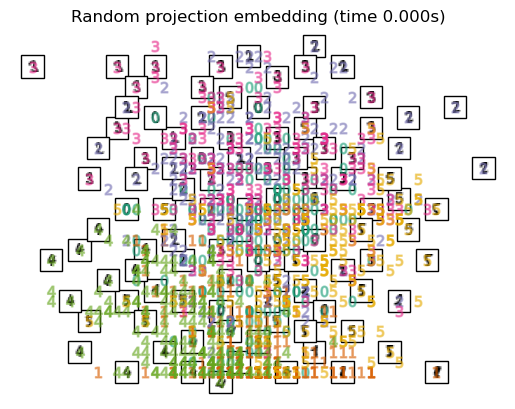

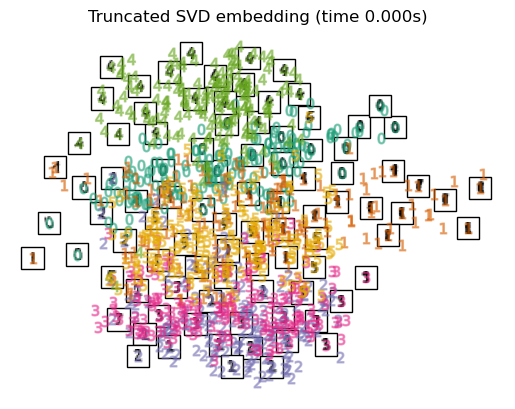

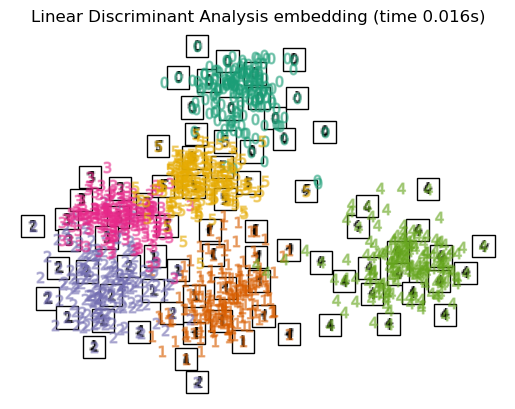

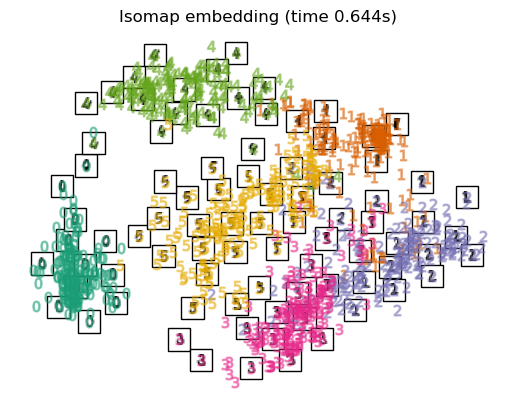

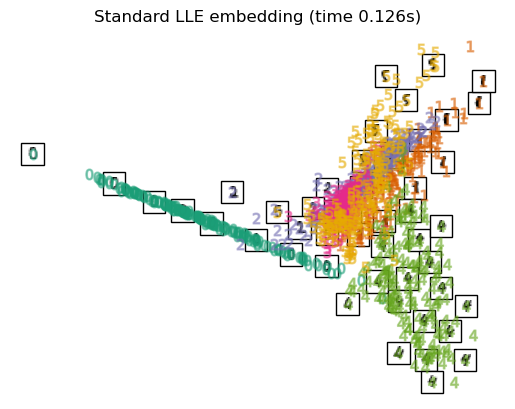

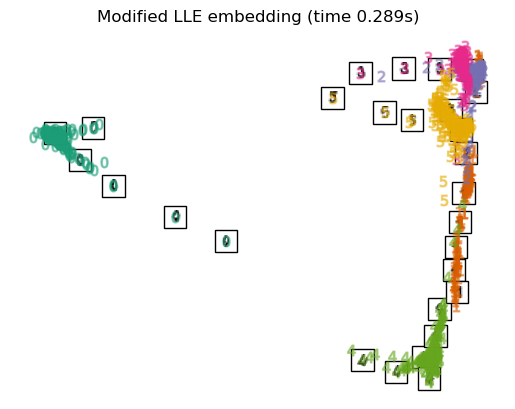

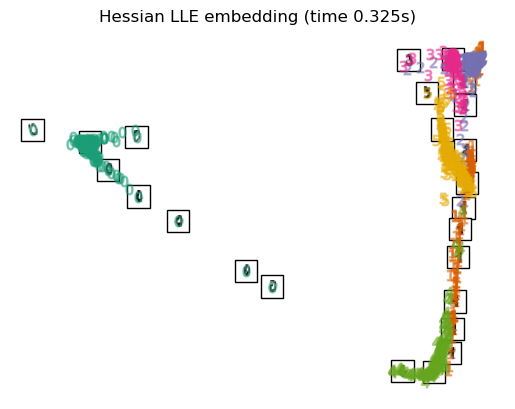

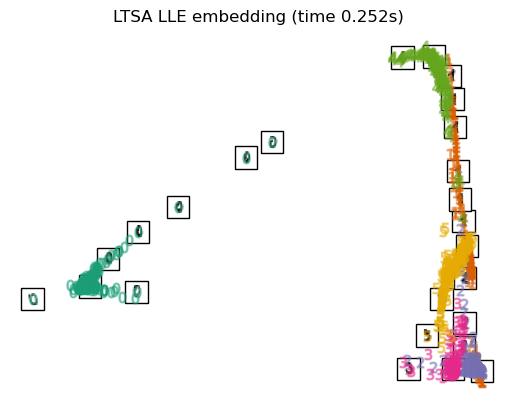

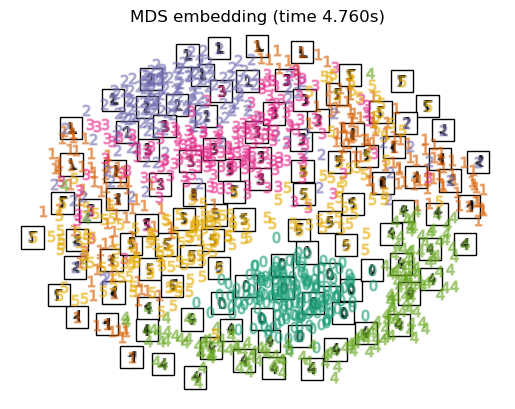

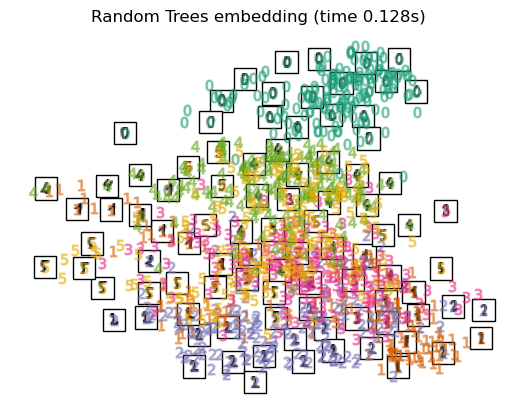

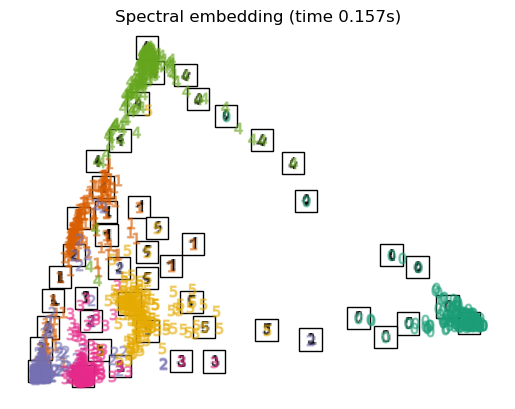

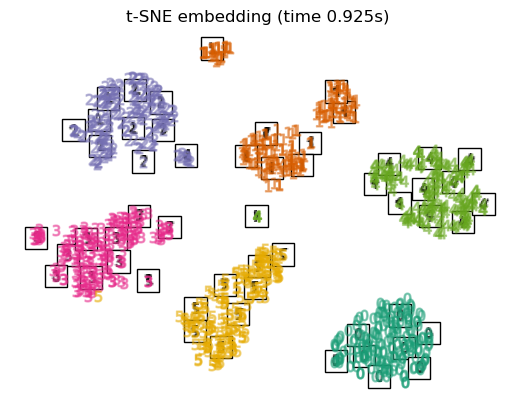

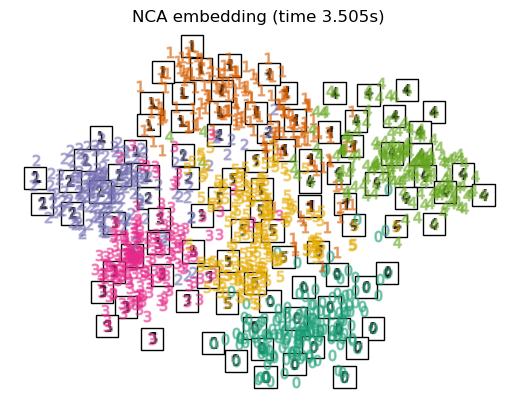

In [101]:
for name in timing:
    title = f"{name} (time {timing[name]:.3f}s)"
    plot_embedding(projections[name], title)

plt.show()

<b>Topic modeling</b>

LatDA (Latent Dirichlet Allocation) -> most widely-used algorithm for topic extraction.

NMF (Non-negative Matrix Factorization) -> used for topic extraction, simpler than LatDA. 

This notebook includes code adapted from the scikit-learn documentation: 
[Topic extraction with Non-Negative Matrix Factorization and Latent Dirichlet Allocation](https://scikit-learn.org/stable/auto_examples/applications/plot_topics_extraction_with_nmf_lda.html).
Original code by scikit-learn developers, available under the BSD 3-Clause License.

In [102]:
def plot_top_words(model, feature_names, n_top_words, title):
    fig, axes = plt.subplots(2, 5, figsize=(15, 10), sharex=True)
    axes = axes.flatten()
    for topic_idx, topic in enumerate(model.components_):
        top_features_ind = topic.argsort()[-n_top_words:]
        top_features = feature_names[top_features_ind]
        weights = topic[top_features_ind]

        ax = axes[topic_idx]
        ax.barh(top_features, weights, height=0.7)
        ax.set_title(f"Topic {topic_idx +1}", fontdict={"fontsize": 20})
        ax.tick_params(axis="both", which="major", labelsize=20)
        for i in "top right left".split():
            ax.spines[i].set_visible(False)
        fig.suptitle(title, fontsize=30)

    plt.subplots_adjust(top=0.90, bottom=0.05, wspace=0.90, hspace=0.3)
    plt.show()

Loading dataset...
done in 0.9515480995178223s.
Extracting tf-idf features for NMF...
done in 0.400496244430542s.
Fitting the NMF model (Frobenius norm) with tf-idf features, n_samples = 2000 and n_features = 1000
done in 0.06305789947509766s.


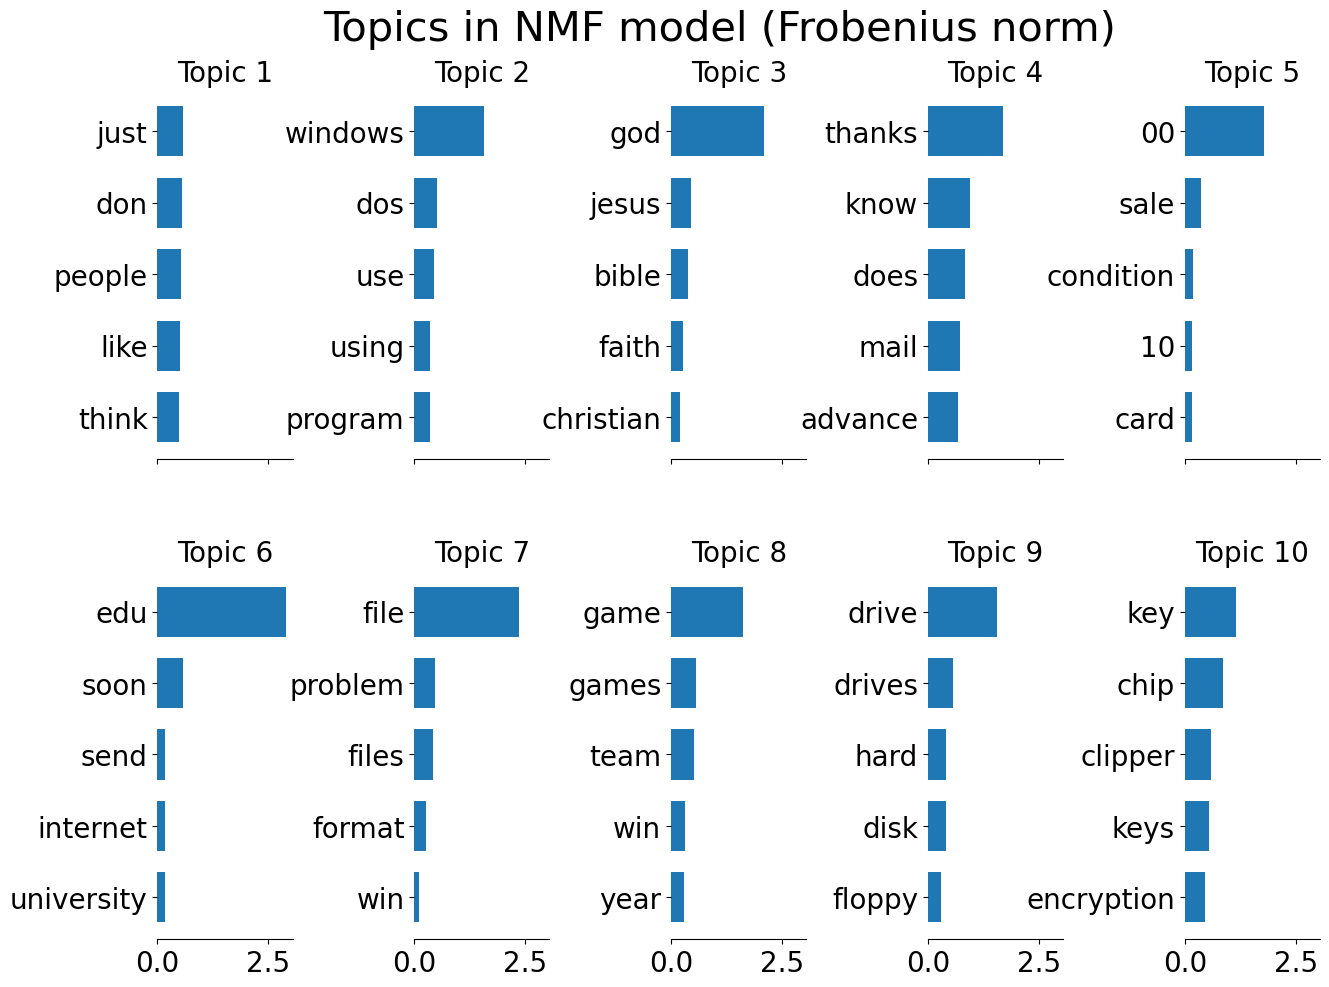

Fitting the NMF model (generalized Kullback-Leibler divergence) with tf-idf features, n_samples = 2000 and n_features = 1000
done in 0.9002282619476318s.


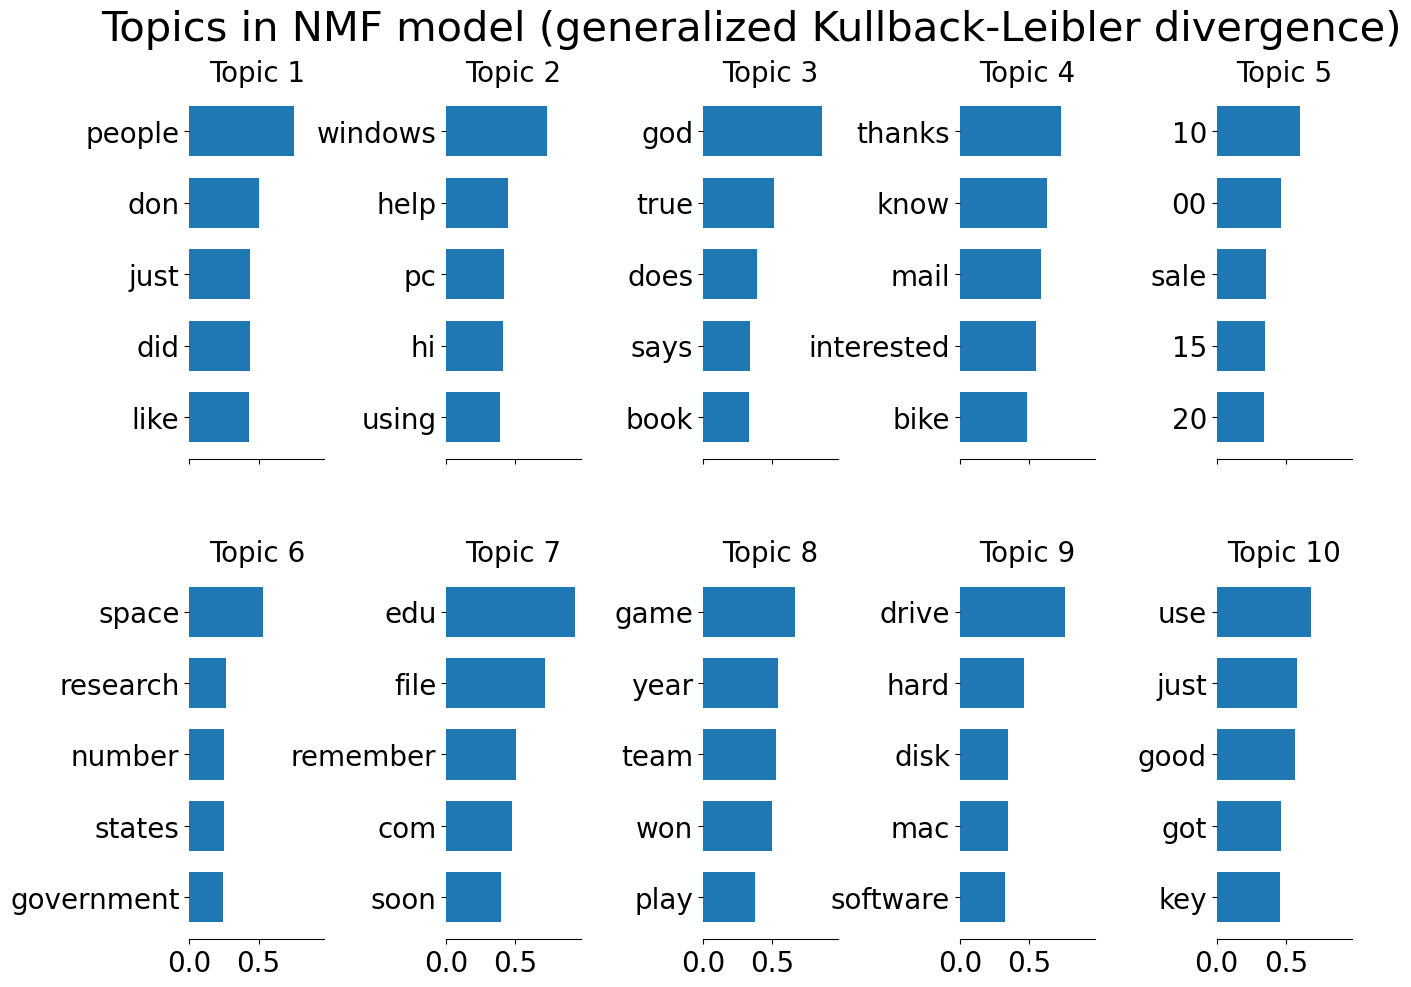

In [103]:
n_samples = 2000
n_features = 1000
n_components = 10
n_top_words = 5
batch_size = 128
init = "nndsvda"


print("Loading dataset...")
t0 = time()
data, _ = fetch_20newsgroups(
    shuffle=True,
    random_state=1,
    remove=("headers", "footers", "quotes"),
    return_X_y=True,
)
data_samples = data[:n_samples]
print(f"done in {(time() - t0)}s.")

# Use tf-idf features for NMF.
print("Extracting tf-idf features for NMF...")
tfidf_vectorizer = TfidfVectorizer(
    max_df=0.95, min_df=2, max_features=n_features, stop_words="english"
)
t0 = time()
tfidf = tfidf_vectorizer.fit_transform(data_samples)
print(f"done in {(time() - t0)}s.")

# Fit the NMF model
print(f"Fitting the NMF model (Frobenius norm) with tf-idf features, n_samples = {n_samples} and n_features = {n_features}")

t0 = time()
nmf = NMF(
    n_components=n_components,
    random_state=1,
    init=init,
    beta_loss="frobenius",
    alpha_W=0.00005,
    alpha_H=0.00005,
    l1_ratio=1,
).fit(tfidf)
print(f"done in {(time() - t0)}s.")


tfidf_feature_names = tfidf_vectorizer.get_feature_names_out()
plot_top_words(
    nmf, tfidf_feature_names, n_top_words, "Topics in NMF model (Frobenius norm)"
)

# Fit the NMF model
print(f"Fitting the NMF model (generalized Kullback-Leibler divergence) with tf-idf features, n_samples = {n_samples} and n_features = {n_features}")

t0 = time()
nmf = NMF(
    n_components=n_components,
    random_state=1,
    init=init,
    beta_loss="kullback-leibler",
    solver="mu",
    max_iter=1000,
    alpha_W=0.00005,
    alpha_H=0.00005,
    l1_ratio=0.5,
).fit(tfidf)
print(f"done in {(time() - t0)}s.")

tfidf_feature_names = tfidf_vectorizer.get_feature_names_out()
plot_top_words(
    nmf,
    tfidf_feature_names,
    n_top_words,
    "Topics in NMF model (generalized Kullback-Leibler divergence)",
)

Extracting tf features for LatDA...
done in 0.21014094352722168s.

Fitting LatDA models with tf features, n_samples = 2000 and n_features = 1000
done in 2.525993824005127s.


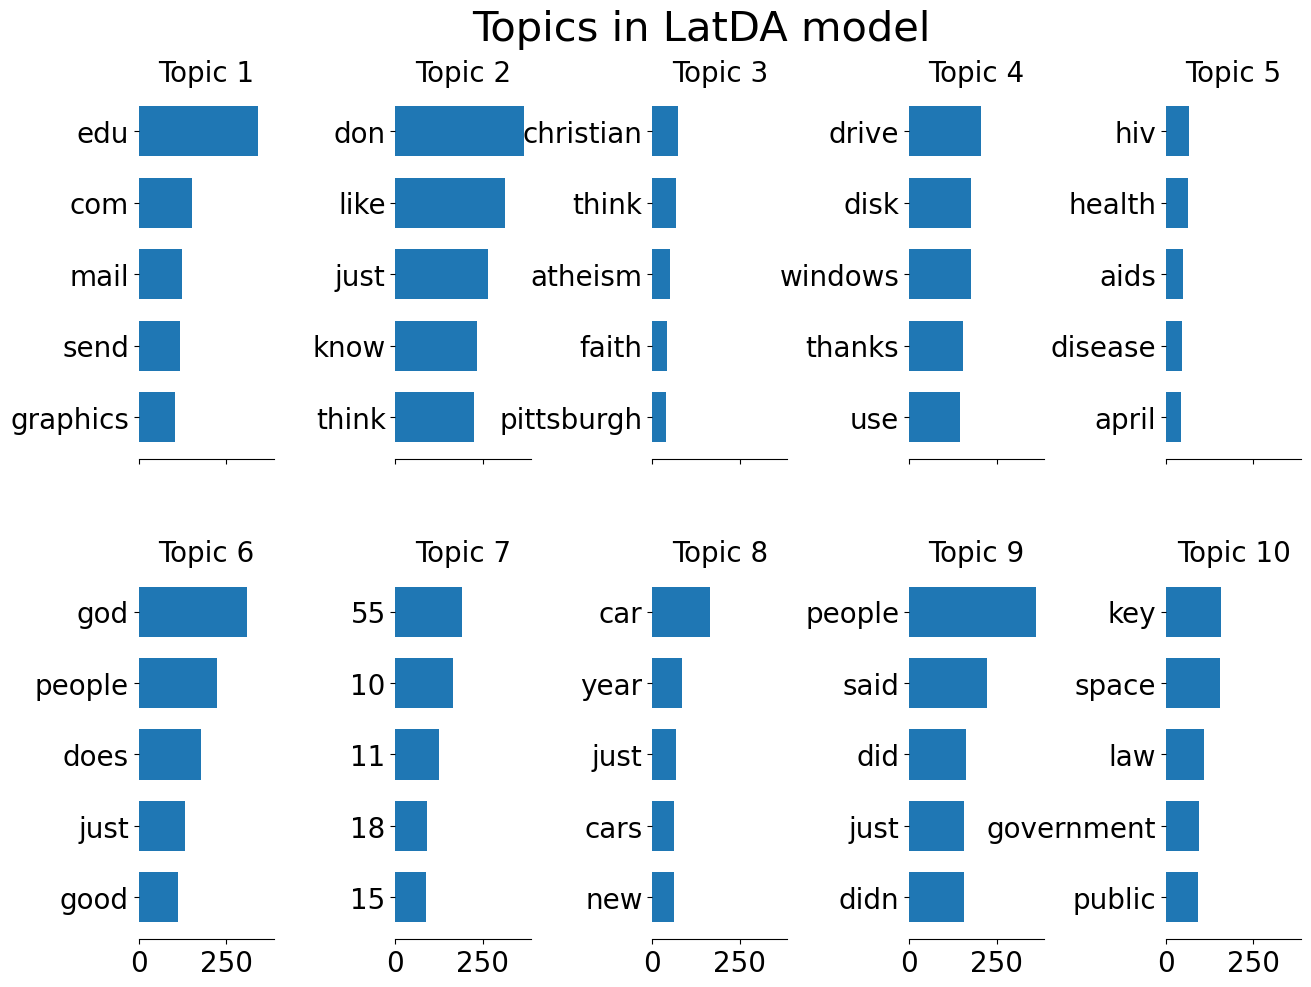

In [104]:
# Use tf (raw term count) features for LDA.
print("Extracting tf features for LatDA...")
tf_vectorizer = CountVectorizer(
    max_df=0.95, min_df=2, max_features=n_features, stop_words="english"
)
t0 = time()
tf = tf_vectorizer.fit_transform(data_samples)
print(f"done in {(time() - t0)}s.")
print()

print(f"Fitting LatDA models with tf features, n_samples = {n_samples} and n_features = {n_features}")

latda = LatentDirichletAllocation(
    n_components=n_components,
    max_iter=5,
    learning_method="online",
    learning_offset=50.0,
    random_state=0,
)
t0 = time()
latda.fit(tf)
print(f"done in {(time() - t0)}s.")

tf_feature_names = tf_vectorizer.get_feature_names_out()
plot_top_words(latda, tf_feature_names, n_top_words, "Topics in LatDA model")

<b>Exaple: Eigenfaces</b>

This notebook includes code adapted from the scikit-learn documentation: [Faces recognition example using eigenfaces and SVMs](https://scikit-learn.org/stable/auto_examples/applications/plot_face_recognition.html). 

Dataset: [“Labeled Faces in the Wild”, aka LFW](http://vis-www.cs.umass.edu/lfw/#download)
Gary B. Huang, Vidit Jain, and Erik Learned-Miller. Unsupervised joint alignment of complex images. International Conference on Computer Vision (ICCV), 2007.

In [105]:
lfw_people = fetch_lfw_people(data_home='data', min_faces_per_person=70, resize=0.4) # select only persons with more than 70 images

n_samples, h, w = lfw_people.images.shape

X = lfw_people.data
n_features = X.shape[1]

y = lfw_people.target  # the label to predict is the id of the person
target_names = lfw_people.target_names
n_classes = target_names.shape[0]

print("Total dataset size:")
print(f"n_samples: {n_samples}")
print(f"n_features: {n_features}")
print(f"n_classes: {n_classes}")

Total dataset size:
n_samples: 1288
n_features: 1850
n_classes: 7


In [106]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [107]:
n_components = 150

print(f"Extracting the top {n_components} eigenfaces from {X_train.shape[0]} faces")

t0 = time()
pca = PCA(n_components=n_components, svd_solver="randomized", whiten=True).fit(X_train)
print(f"done in {(time() - t0)}s")

eigenfaces = pca.components_.reshape((n_components, h, w))

print("Projecting the input data on the eigenfaces orthonormal basis")
t0 = time()
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)
print(f"done in {(time() - t0)}s")

Extracting the top 150 eigenfaces from 966 faces
done in 0.09404993057250977s
Projecting the input data on the eigenfaces orthonormal basis
done in 0.015627145767211914s


In [108]:
print("Fitting the classifier to the training set")
t0 = time()
param_grid = {
    "C": loguniform(1e3, 1e5),
    "gamma": loguniform(1e-4, 1e-1),
}
clf = RandomizedSearchCV(
    SVC(kernel="rbf", class_weight="balanced"), param_grid, n_iter=10
)
clf = clf.fit(X_train_pca, y_train)
print(f"done in {(time() - t0)}s")
print("Best estimator found by grid search:")
print(clf.best_estimator_)

Fitting the classifier to the training set
done in 3.4519712924957275s
Best estimator found by grid search:
SVC(C=3540.0734904409546, class_weight='balanced', gamma=0.002384179437651875)


Predicting people's names on the test set
done in 0.03130006790161133s
                   precision    recall  f1-score   support

     Ariel Sharon       0.65      0.85      0.73        13
     Colin Powell       0.72      0.87      0.79        60
  Donald Rumsfeld       0.75      0.67      0.71        27
    George W Bush       0.91      0.93      0.92       146
Gerhard Schroeder       0.95      0.72      0.82        25
      Hugo Chavez       0.90      0.60      0.72        15
       Tony Blair       0.93      0.78      0.85        36

         accuracy                           0.84       322
        macro avg       0.83      0.77      0.79       322
     weighted avg       0.85      0.84      0.84       322



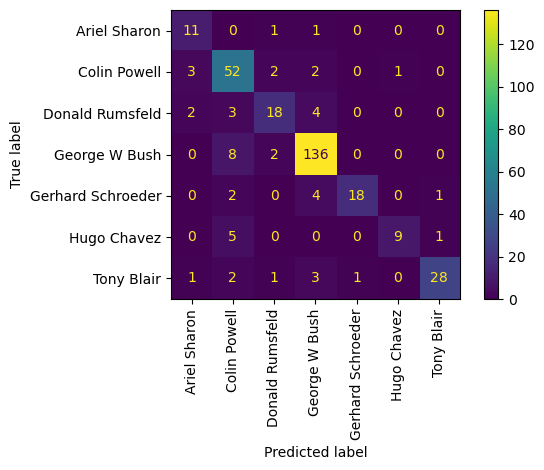

In [109]:
print("Predicting people's names on the test set")
t0 = time()
y_pred = clf.predict(X_test_pca)
print(f"done in {(time() - t0)}s")

print(classification_report(y_test, y_pred, target_names=target_names))
ConfusionMatrixDisplay.from_estimator(
    clf, X_test_pca, y_test, display_labels=target_names, xticks_rotation="vertical"
)
plt.tight_layout()
plt.show()

In [110]:
def plot_gallery(images, titles, h, w, n_row=3, n_col=4):
    """Helper function to plot a gallery of portraits"""
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=0.01, right=0.99, top=0.90, hspace=0.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())

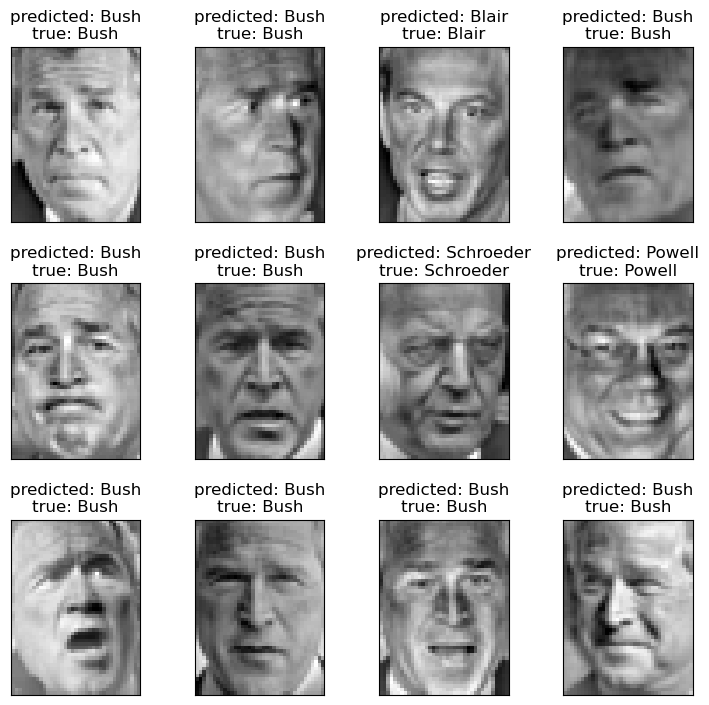

In [111]:
def title(y_pred, y_test, target_names, i):
    pred_name = target_names[y_pred[i]].rsplit(" ", 1)[-1]
    true_name = target_names[y_test[i]].rsplit(" ", 1)[-1]
    return f"predicted: {pred_name}\ntrue: {true_name}"

prediction_titles = [
    title(y_pred, y_test, target_names, i) for i in range(y_pred.shape[0])
]

plot_gallery(X_test, prediction_titles, h, w)

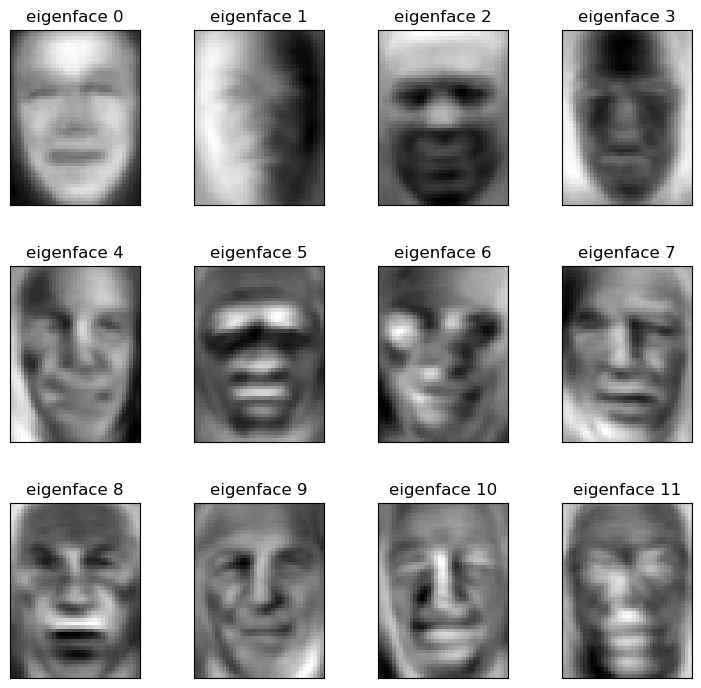

In [112]:
eigenface_titles = ["eigenface %d" % i for i in range(eigenfaces.shape[0])]
plot_gallery(eigenfaces, eigenface_titles, h, w)

plt.show()

<b>Example: Iris Dataset -> PCA, t-SNE...</b>

In [115]:
iris = load_iris()

In [116]:
attributes, target = iris['data'], iris['target']

In [117]:
attrs_train, attrs_test, target_train, target_test = train_test_split(attributes, target, test_size = 0.1, random_state = 42)

PCA

In [132]:
pca = PCA(n_components = 2)

In [133]:
pca.fit(attrs_train)

PCA(n_components=2)

In [140]:
transformed_pca_attrs = pca.transform(attrs_train)

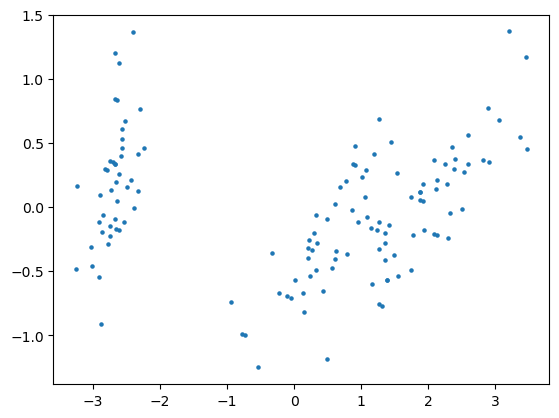

In [141]:
plt.scatter(transformed_pca_attrs[:, 0], transformed_pca_attrs[:, 1], s = 5)
# plt.gca().set_aspect('equal')
plt.show()

Isomap

In [194]:
isomap = Isomap(n_neighbors = 10)
transformed_isomap_data = isomap.fit_transform(attrs_train)

C:\Users\diton\anaconda3\Lib\site-packages\scipy\sparse\_index.py:100: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


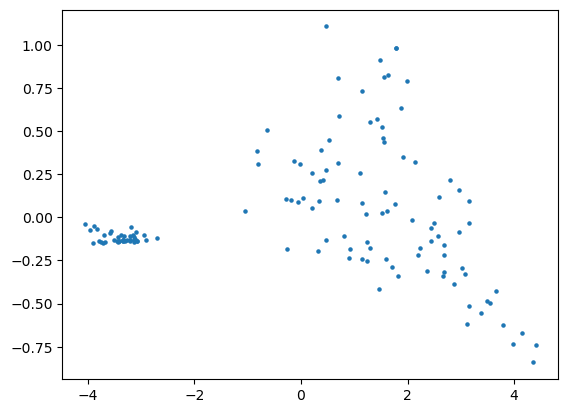

In [144]:
plt.scatter(transformed_isomap_data[:, 0], transformed_isomap_data[:, 1], s = 5)
# plt.gca().set_aspect('equal')
plt.show()

t-SNE

In [146]:
tsne = TSNE(n_components = 2, init = "pca")
transformed_tsne_data = tsne.fit_transform(attrs_train)

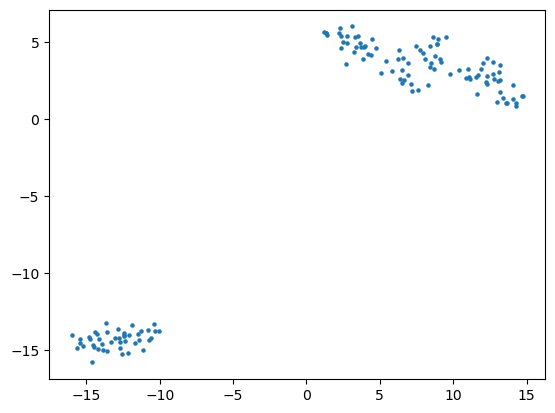

In [147]:
plt.scatter(transformed_tsne_data[:, 0], transformed_tsne_data[:, 1], s = 5)
# plt.gca().set_aspect('equal')
plt.show()

<b>Pipeline with a DR algoithm and a classifier</b>

SVM

In [168]:
pca = PCA(n_components = 2)

In [169]:
svm = SVC()

In [170]:
pipeline = make_pipeline(StandardScaler(), pca, svm)

pipeline.fit(attrs_train, target_train)
train_score = pipeline.score(attrs_train, target_train)
test_score = pipeline.score(attrs_test, target_test)

cv_scores = cross_val_score(pipeline, attributes, target, cv=5)

train_score, test_score, cv_scores.mean()

(0.9259259259259259, 0.8666666666666667, 0.9133333333333333)

In [171]:
# without PCA
pipeline = make_pipeline(StandardScaler(), svm)

pipeline.fit(attrs_train, target_train)
train_score = pipeline.score(attrs_train, target_train)
test_score = pipeline.score(attrs_test, target_test)

cv_scores = cross_val_score(pipeline, attributes, target, cv=5)

train_score, test_score, cv_scores.mean()

(0.9777777777777777, 1.0, 0.9666666666666666)

In [200]:
isomap = Isomap(n_neighbors = 10, n_components = 2, metric='euclidean') 

In [201]:
pipeline = make_pipeline(StandardScaler(), isomap, svm)

pipeline.fit(attrs_train, target_train)
train_score = pipeline.score(attrs_train, target_train)
test_score = pipeline.score(attrs_test, target_test)

cv_scores = cross_val_score(pipeline, attributes, target, cv=5)

train_score, test_score, cv_scores.mean()

(0.9111111111111111, 0.8666666666666667, 0.8866666666666667)

In [183]:
scaler = StandardScaler()
attrs_train_scaled = scaler.fit_transform(attrs_train)
attrs_test_scaled = scaler.transform(attrs_test)

# Apply t-SNE on training data
tsne = TSNE(n_components = 2, perplexity = 5, random_state = 42)
attrs_train_tsne = tsne.fit_transform(attrs_train_scaled)

# Transform test data (t-SNE is not typically used for transforming new data)
# This is just for illustrative purposes
attrs_test_tsne = tsne.fit_transform(attrs_test_scaled)  

svm = SVC()
svm.fit(attrs_train_tsne, target_train)

# Score the SVM on the transformed training and test data
train_score = svm.score(attrs_train_tsne, target_train)
test_score = svm.score(attrs_test_tsne, target_test)

# using PCA or another method is recommended for generalization
# t-SNE cannot be used in a pipeline
cv_scores = cross_val_score(SVC(), scaler.fit_transform(attributes), target, cv = 5)

train_score, test_score, cv_scores.mean()

(0.9481481481481482, 0.4666666666666667, 0.9666666666666666)

RandomForest

In [186]:
pipeline_pca = make_pipeline(StandardScaler(), PCA(n_components = 2), RandomForestClassifier(random_state = 42))

# Fit the pipeline on the training data
pipeline_pca.fit(attrs_train, target_train)

# Score on training and test data
train_score_pca = pipeline_pca.score(attrs_train, target_train)
test_score_pca = pipeline_pca.score(attrs_test, target_test)

# Cross-validation
cv_scores_pca = cross_val_score(pipeline_pca, attributes, target, cv = 5)

train_score_pca, test_score_pca, cv_scores_pca.mean()

(1.0, 0.8666666666666667, 0.9)

In [202]:
pipeline_isomap = make_pipeline(StandardScaler(), Isomap(n_neighbors = 10, n_components = 2, metric='euclidean'), RandomForestClassifier(random_state = 42))

# Fit the pipeline on the training data
pipeline_isomap.fit(attrs_train, target_train)

# Score on training and test data
train_score_isomap = pipeline_pca.score(attrs_train, target_train)
test_score_isomap = pipeline_pca.score(attrs_test, target_test)

# Cross-validation
cv_scores_isomap = cross_val_score(pipeline_isomap, attributes, target, cv = 5)

train_score_isomap, test_score_isomap, cv_scores_isomap.mean()

(1.0, 0.8666666666666667, 0.9)